In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.core.display import HTML

In [2]:
# %pip install lib/extcolors
import extcolors

## Data Set

from Kaggle [Best Artworks of All Time](https://www.kaggle.com/ikarus777/best-artworks-of-all-time)

In [3]:
df_artists = pd.read_csv('data/best-artworks-of-all-time/artists.csv')
df_artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


## Color Extraction

Explore some ways to perform [color quantization](https://en.wikipedia.org/wiki/Color_quantization) and extract the main colors from the images.

In [4]:
image_path = 'data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_72.jpg'

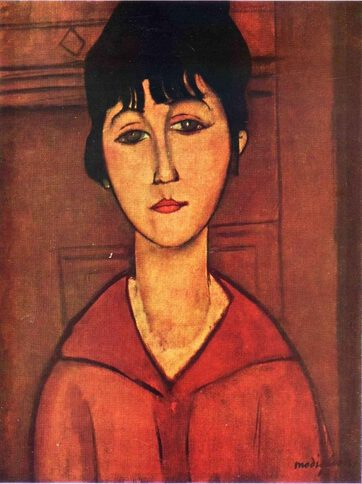

In [5]:
from IPython.display import Image
Image(filename=image_path) 

A utility function to print color blocks.

Just personal choices, I do this with HTML stuff

In [6]:
def color2css(color):
    if type(color) == str:
        return color # '#'+color.lstrip('#')
    
    # Assuming tuple (iterator)
    tp = 'rgb'
    if len(color) == 4:
        tp = 'rgba'
    return f'{tp}{tuple(c for c in color)}' 

def show_color_blocks(colors, labels=None, size='100px'):
    BLOCK_STYLE = f"""
        float: left; 
        width: {size}; height:{size}; 
        font-size: 8px;
        text-align: center;
        text-shadow: white 0px 0px 5px;
        border: 1px solid rgba(60,60,60,0.52);

        margin: 1px;
    """
    
    if labels is None:
        labels = [str(c) for c in colors]
    
    return HTML(''.join([
        f'<span style="background: {color2css(c)}; {BLOCK_STYLE}">{label}</span>'
        for c, label in zip(colors, labels)
    ]))

# example
show_color_blocks([
    (255, 127, 0, 0.5), 
    (255,255,255), 
    (0x6c,0x6c,0x6c),
    '#6c6c6c'
], size='100px')

### Color extraction with `extcolors`

In [7]:
data, pixel_count = extcolors.extract(
    "data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_72.jpg")
(data, pixel_count)

([((139, 74, 54), 131171),
  ((19, 19, 19), 42877),
  ((240, 212, 237), 340),
  ((248, 179, 84), 337),
  ((81, 14, 0), 308),
  ((96, 16, 19), 174),
  ((41, 26, 5), 1)],
 175208)

In [8]:
data, pixel_count = extcolors.extract(image_path, tolerance=32)

In [9]:
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

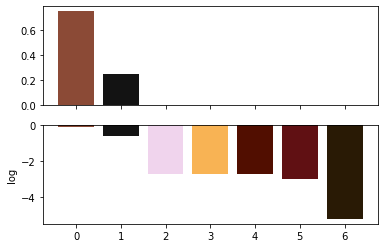

In [10]:
%matplotlib inline
colors = [tuple(i/255 for i in color) for color, _ in data]
histo = np.array([(count / pixel_count) for _, count in data])

x = range(len(labels))
_, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.bar(x, histo, color=colors)
ax2.bar(x, np.log10(histo), color=colors)
ax2.set_ylabel('log')
plt.show()

In [11]:
# Try similar color with lower res
data, pixel_count = extcolors.extract(image_path, tolerance=12)

colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

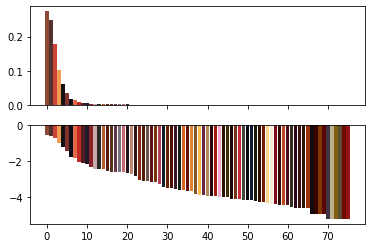

In [12]:
%matplotlib inline
colors = np.array([tuple(i/255 for i in color) for color, _ in data])
amounts = np.array([(count / pixel_count) for _, count in data])

x = range(len(labels))
_, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.bar(x, amounts, color=colors)
ax2.bar(x, np.log10(amounts), color=colors)
plt.show()

### In RGB color space

<IPython.core.display.Javascript object>


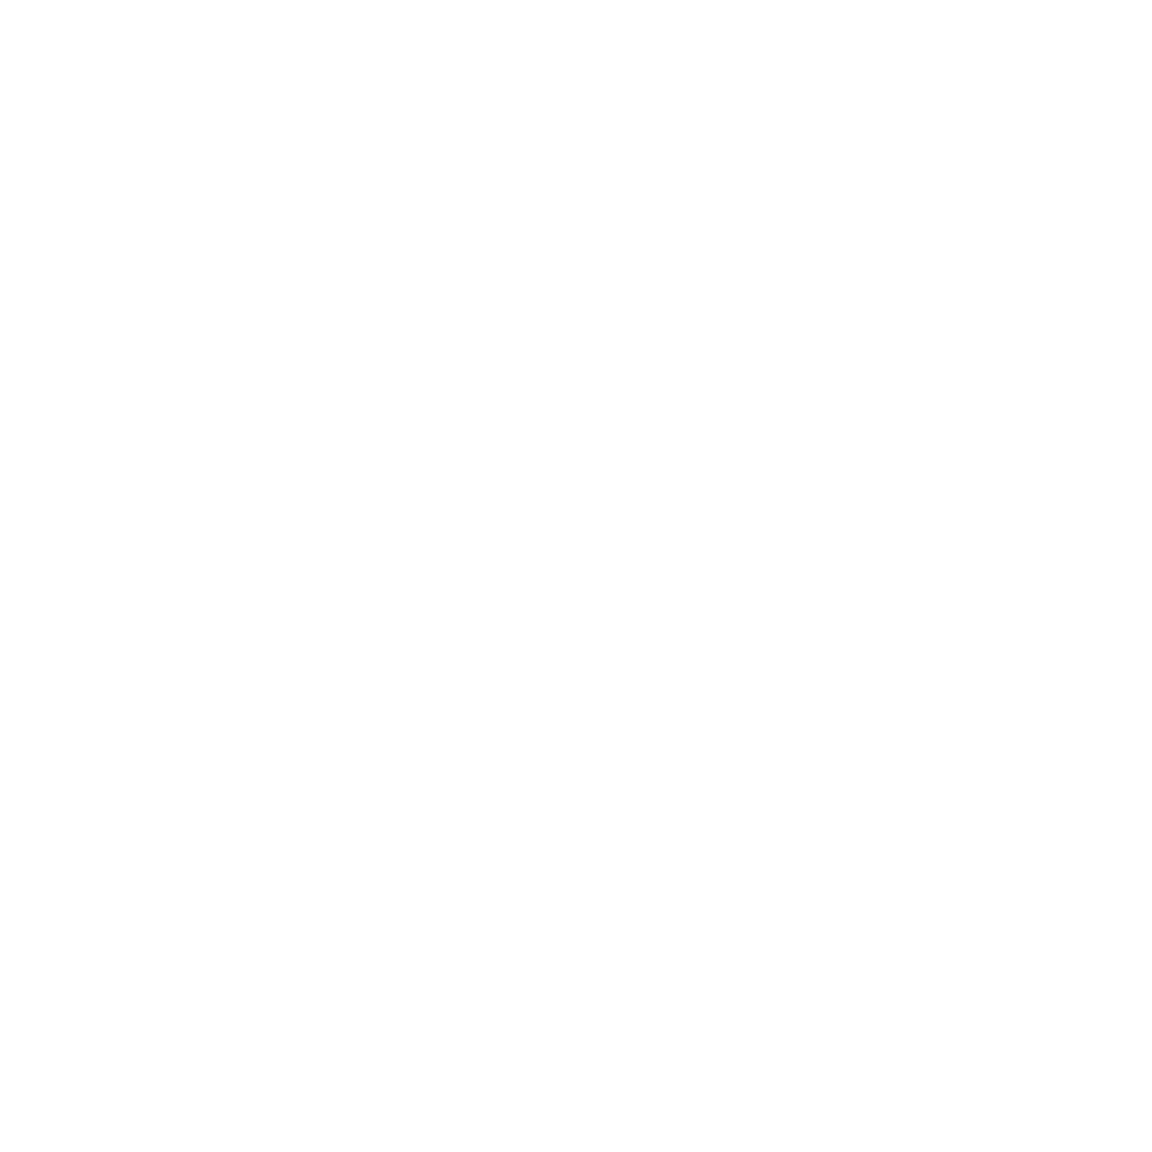

<IPython.core.display.Javascript object>


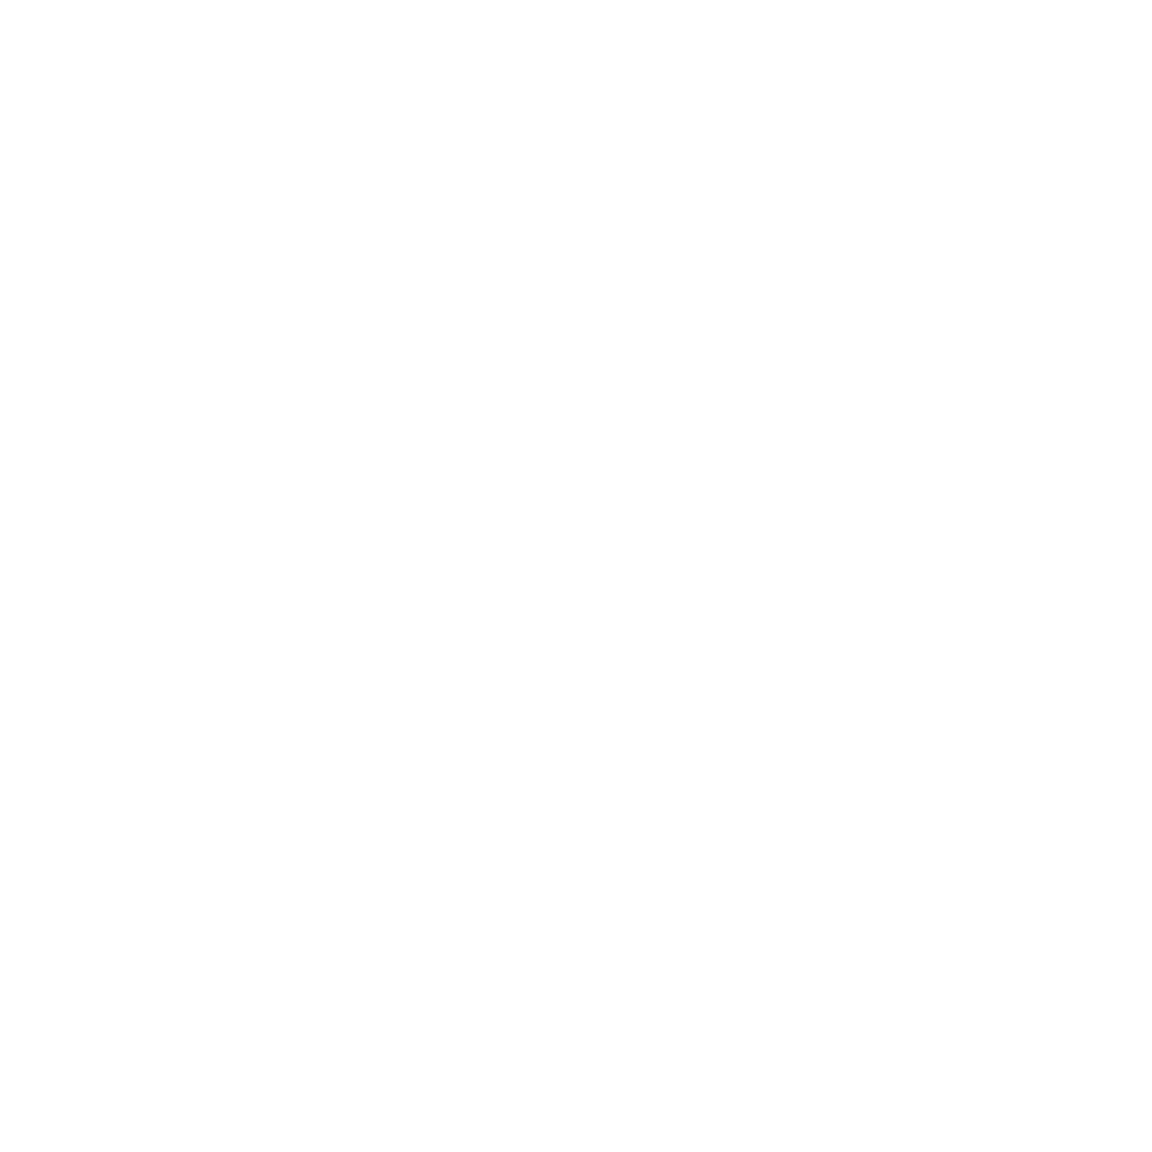

In [13]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d', facecolor='white')

sz = np.log10(amounts)
sz -= sz.min()
sz *= 120

ax.scatter(colors[:,0], colors[:,1], colors[:,2], 
           c=colors, marker='o', 
           s=sz
          )

ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')
plt.show()

### More explorartion on color extractions

In [14]:
# def count_dom_colors():
import time
start = time.time()
image_path = 'data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_73.jpg'
data, pixel_count = extcolors.extract(image_path, tolerance=40)
print(len(data))
time.time() - start

6


39.412445068359375

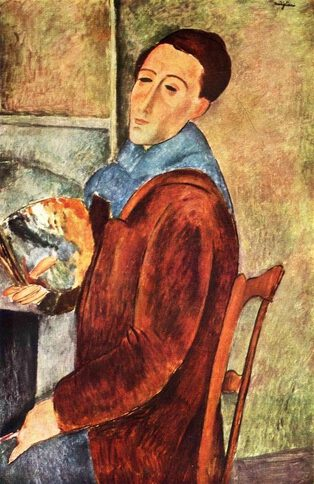

In [15]:
from IPython.display import Image
Image(filename=image_path) 

In [16]:
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

In [17]:
%mkdir data/tmp

mkdir: data/tmp: File exists


In [18]:
# Resize to 100x100
from PIL import Image
im = Image.open(image_path)
im = im.resize((100, 100))
# im.show()
im.save('data/tmp/'+image_path.split('/')[-1])

In [19]:
# def count_dom_colors():
import time
start = time.time()
image_path = 'data/out/Amedeo_Modigliani_73.jpg'
data, pixel_count = extcolors.extract(image_path, tolerance=10)
print(len(data))
time.time() - start

141


0.5552799701690674

In [20]:
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

In [21]:
def resize_extract(image_path, tolerance=32, size=100):
    start = time.time()
    
    im = Image.open(image_path)
    im = im.resize((size, size))
    image_path_out = 'data/tmp/'+image_path.split('/')[-1]
    im.save(image_path_out)
    print(f'resized image saved to "{image_path_out}"')

    data, pixel_count = extcolors.extract(image_path_out, tolerance=tolerance)
    
    print(f'done in {time.time() - start}')
    return data, pixel_count

#example 
resize_extract('data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_73.jpg')
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]
show_color_blocks(colors, labels, size="50px")

resized image saved to "data/tmp/Amedeo_Modigliani_73.jpg"
done in 0.22133398056030273


In [22]:
import os

rootDir = 'data/best-artworks-of-all-time/images/images'
for dirName, subdirList, fileList in os.walk(rootDir, topdown=False):
    #print('directory: %s' % dirName)
    for fname in fileList:
        #print('\t%s' % fname)
        pass

In [23]:
c1 = np.array(colors[0])
c2 = np.array(colors[1])

import colorsys
colorsys.rgb_to_hsv(*c1)

(0.09365079365079365, 0.5048076923076923, 208)

In [24]:
colorsys.rgb_to_hsv(*c2)

(0.01807228915662651, 0.6535433070866141, 127)

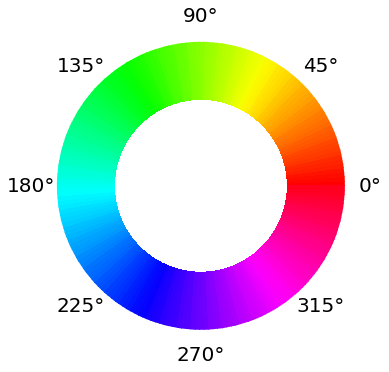

In [25]:
%matplotlib inline
fg = plt.figure(figsize=(5,5))
ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

cmap = plt.cm.hsv
# Define colormap normalization for 0 to 2*pi
norm = mpl.colors.Normalize(0, 2*np.pi)  

# Plot a color mesh on the polar plot
# with the color set by the angle

n = 200  #the number of secants for the mesh
t = np.linspace(0,2*np.pi,n)   #theta values
r = np.linspace(.6,1,2)        #radius values change 0.6 to 0 for full circle
rg, tg = np.meshgrid(r,t)      #create a r,theta meshgrid
c = tg                         #define color values as theta value

im = ax.pcolormesh(t, r, c.T, cmap=cmap, norm=norm)  #plot the colormesh on axis with colormap
ax.set_yticklabels([])                    #turn of radial tick labels (yticks)
ax.tick_params(pad=15, labelsize=20)      #cosmetic changes to tick labels
ax.spines['polar'].set_visible(False)

In [26]:
c_red = (255, 0, 0)
h,_,_=colorsys.rgb_to_hsv(*c_red)
angle_red = h*2*np.pi
angle_red

0.0

In [27]:
c_red_ = (0, 255, 255)
h,_,_=colorsys.rgb_to_hsv(*c_red_)
angle_red_ = h*2*np.pi
angle_red_

3.141592653589793

In [28]:
show_color_blocks([(0, 255, 255)])

In [29]:
def get_color_angle(color, scale=2*np.pi ):
    h,_,_=colorsys.rgb_to_hsv(*color)
    return h*scale

# example
get_color_angle((0, 255, 255))

3.141592653589793

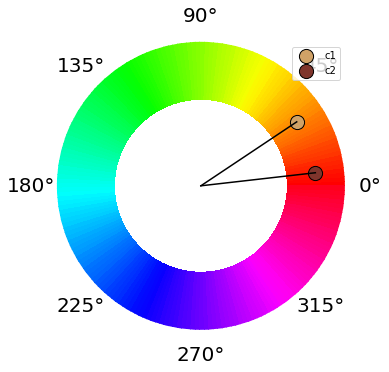

In [30]:
%matplotlib inline
fg = plt.figure(figsize=(5,5))
ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

cmap = plt.cm.hsv
# Define colormap normalization for 0 to 2*pi
norm = mpl.colors.Normalize(0, 2*np.pi)  

# Plot a color mesh on the polar plot
# with the color set by the angle

n = 200  #the number of secants for the mesh
t = np.linspace(0, 2*np.pi, n)   #theta values
r = np.linspace(.6, 1, 2)        #radius values change 0.6 to 0 for full circle
rg, tg = np.meshgrid(r,t)        #create a r,theta meshgrid
c = tg                           #define color values as theta value
im = ax.pcolormesh(t, r, c.T, cmap=cmap, norm=norm)  #plot the colormesh on axis with colormap
ax.set_yticklabels([])                   #turn of radial tick labels (yticks)

h_c1 = get_color_angle(c1)
h_c2 = get_color_angle(c2)
ax.scatter(h_c1, 0.8, c=[c1/255], s=200, edgecolor='k')
ax.scatter(h_c2, 0.8, c=[c2/255], s=200, edgecolor='k')

ax.legend(['c1', 'c2'])

# ax.text(h_c1, 0.8, 'c1')
# ax.text(h_c2, 0.8, 'c2')
ax.plot([0, h_c1], [0, 0.8], color='k')
ax.plot([0, h_c2], [0, 0.8], color='k')

ax.tick_params(pad=15, labelsize=20)      #cosmetic changes to tick labels
ax.spines['polar'].set_visible(False)

In [31]:
# Complementary color metrics (inversed)
def metric_similar_hue(c1, c2):
    """
    [0, 1]
    
    0: complementary color hue
    1: same (similar) color hue
    """
    h1 = get_color_angle(c1, scale=1)  # h is from 0 to 1 (since scale==1)
    h2 = get_color_angle(c2, scale=1)
    
    h1_ = (0.5 + h1) % 1  # circular
    m = np.abs(h1_ - h2) * 2  # abs to kill linear-ness
    return m

metric_similar_hue((255,0,0), (0,255,255))

0.0

In [32]:
metric_similar_hue((255,0,0), (0,0,255))

0.33333333333333326

In [33]:
metric_similar_hue((255,0,0), (255,0,0))

1.0

In [34]:
metric_similar_hue((255,0,0), (255,255,0))

0.6666666666666667

similar_hue metrics: 0.6666666666666667


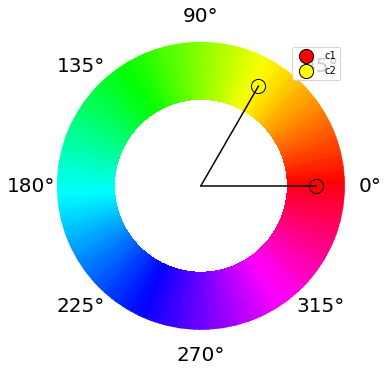

In [35]:
# make sure it make sense
%matplotlib inline

def show_colors_on_ring(c1, c2):
    c1 = np.array(c1)
    c2 = np.array(c2)
    
    fg = plt.figure(figsize=(5,5))
    ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

    cmap = plt.cm.hsv
    # Define colormap normalization for 0 to 2*pi
    norm = mpl.colors.Normalize(0, 2*np.pi)  

    # Plot a color mesh on the polar plot
    # with the color set by the angle

    n = 200  #the number of secants for the mesh
    t = np.linspace(0, 2*np.pi, n)   #theta values
    r = np.linspace(.6, 1, 2)        #radius values change 0.6 to 0 for full circle
    rg, tg = np.meshgrid(r,t)        #create a r,theta meshgrid
    c = tg                           #define color values as theta value
    im = ax.pcolormesh(t, r, c.T, cmap=cmap, norm=norm)  #plot the colormesh on axis with colormap
    ax.set_yticklabels([])                   #turn of radial tick labels (yticks)

    h_c1 = get_color_angle(c1)
    h_c2 = get_color_angle(c2)
    ax.scatter(h_c1, 0.8, c=[c1/255], s=200, edgecolor='k')
    ax.scatter(h_c2, 0.8, c=[c2/255], s=200, edgecolor='k')

    ax.legend(['c1', 'c2'])

    # ax.text(h_c1, 0.8, 'c1')
    # ax.text(h_c2, 0.8, 'c2')
    ax.plot([0, h_c1], [0, 0.8], color='k')
    ax.plot([0, h_c2], [0, 0.8], color='k')

    ax.tick_params(pad=15, labelsize=20)      #cosmetic changes to tick labels
    ax.spines['polar'].set_visible(False)
    
c1 = (255, 0, 0)
c2 = (255, 255, 0)
print('similar_hue metrics:', metric_similar_hue(c1, c2))
show_colors_on_ring(c1, c2)

similar_hue metrics: 0.0


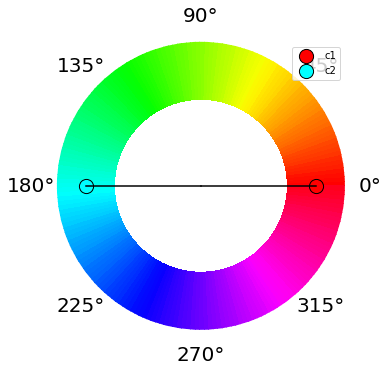

In [36]:
c1 = (255, 0, 0)
c2 = (0, 255, 255)
print('similar_hue metrics:', metric_similar_hue(c1, c2))
show_colors_on_ring(c1, c2)

similar_hue metrics: 0.33333333333333326


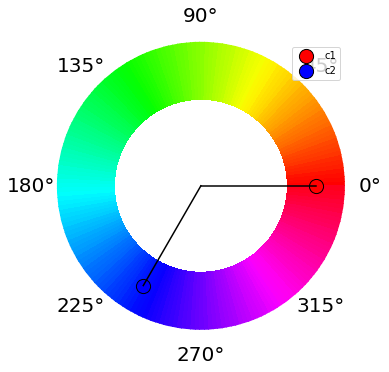

In [37]:
c1 = (255, 0, 0)
c2 = (0, 0, 255)
print('similar_hue metrics:', metric_similar_hue(c1, c2))
show_colors_on_ring(c1, c2)

similar_hue metrics: 0.4980392156862745


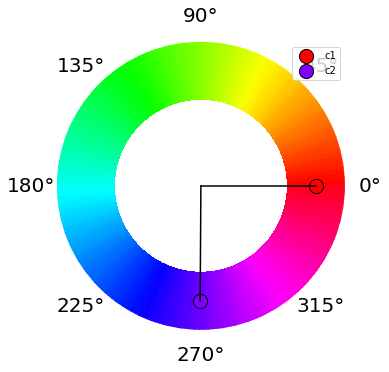

In [38]:
c1 = (255, 0, 0)
c2 = (126, 0, 255)
print('similar_hue metrics:', metric_similar_hue(c1, c2))
show_colors_on_ring(c1, c2)

### Limitations

However, using only hue as substitative/complementary metric will fail to 
capture the lightness of the colors.

e.g. for a painting that uses _dark-red_ color and _light-red_ color as theme colors, 
we might still get two red hues -> similar. But actually they can be quite distinct. 

If we have a red-biased painting, e.g. a painting that consists and only consists of
red colors - just various in saturation, subjectively, I would say the painting can
still be contrast by different degrees of red.

A way to approach this issue could be find a way to cooperate **h**ue **s**aturation and **v**alue together.

In [39]:
c1 = colors[0]
c2 = colors[1]
c1_=255-np.array(c1)

In [40]:
sum(np.square(c1_-np.array(c2)))

19664